py 36 env. Don't forget to set the API key in system env.

https://www.clarifai.com/developer/quick-start/

In [2]:
from clarifai.rest import ClarifaiApp
import requests as rq
import os
import matplotlib.pyplot as plt
%matplotlib inline
import sys
print(sys.version)

def download_image(url, file_name):
    """"COnvenience to download web image."""
    with open(file_name, "wb") as file:
        response = rq.get(url+file_name)
        file.write(response.content)
        print(file_name + " downloaded from " + url)
        
def list_files():
    """Convenience to list files in current directory."""
    return [f for f in os.listdir('.') if os.path.isfile(f)]

3.6.3 (default, Oct  4 2017, 06:09:38) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]


In [3]:
app = ClarifaiApp()
model = app.models.get('general-v1.3')
base_url = 'https://samples.clarifai.com/'

In [4]:
file_name = 'metro-north.jpg'
download_image(base_url, file_name)

metro-north.jpg downloaded from https://samples.clarifai.com/


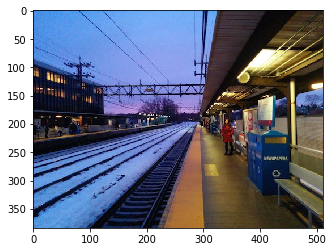

In [5]:
img = plt.imread(file_name)
plt.imshow(img)
plt.show()

In [6]:
response = model.predict_by_url(base_url+file_name)

In [7]:
concepts = response['outputs'][0]['data']['concepts']
for concept in concepts:
    print(concept['name'], concept['value'])

train 0.9987074
railway 0.9971304
transportation system 0.99544376
locomotive 0.9914662
station 0.9910724
travel 0.98730266
subway system 0.9797999
commuter 0.9676262
traffic 0.9670719
railroad track 0.96478844
blur 0.964049
urban 0.95840275
no person 0.95792294
platform 0.957827
business 0.95676255
track 0.9446391
city 0.9392204
fast 0.93650824
road 0.9306638
terminal 0.91909647
